# Imports / Values

Welcome! Please type in a potential target's RA and Dec (in the form RA:[hh mm ss] and Dec:[°° ′′ ″″]): 
RA -> 10 18 00
Dec -> 21 48 42

Please designate the relevant time frame in which you wish to view this object (in form yyyy-mm-dd hh:mm:ss): 
Start Date & Time -> 
End Date & Time -> 

-------------------------------------------------------------------------


C:\Users\Taylah\Anaconda3\lib\site-packages\astroquery\utils\commons.py:187: UserWarning: Coordinate string is being interpreted as an ICRS coordinate.
  warnings.warn("Coordinate string is being interpreted as an "


INFO: Red: [aplpy.rgb]
INFO: vmin =  4.316e+03 (auto) [aplpy.rgb]
INFO: vmax =  1.796e+04 (auto) [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  2.895e+03 (auto) [aplpy.rgb]
INFO: vmax =  1.398e+04 (auto) [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  3.183e+03 (auto) [aplpy.rgb]
INFO: vmax =  1.295e+04 (auto) [aplpy.rgb]


C:\Users\Taylah\Anaconda3\lib\site-packages\aplpy\rgb.py:218: UserWarning: PyAVM 0.9.1 or later is not installed, so AVM tags will not be embedded in RGB image
  warnings.warn("PyAVM 0.9.1 or later is not installed, so AVM tags will not be embedded in RGB image")


-------------------------------------------------------------------------


RA [h m s]: 10 18 00
DEC [° ′ ″]: 21 48 42

Galactic longitude:  213d03m30.8372s
Galactic latitude:  54d49m07.0626s

DUST (Standard Deviation):  0.00455000837535
DUST (Mean):  0.0244096222058
DUST (Min):  0.0151706438638
DUST (Max):  0.0485131473588


Would you like to save this information?
[y or n] ->  y
Image saved as: "Information (RA:10 18 00-DEC21 48 42).png"


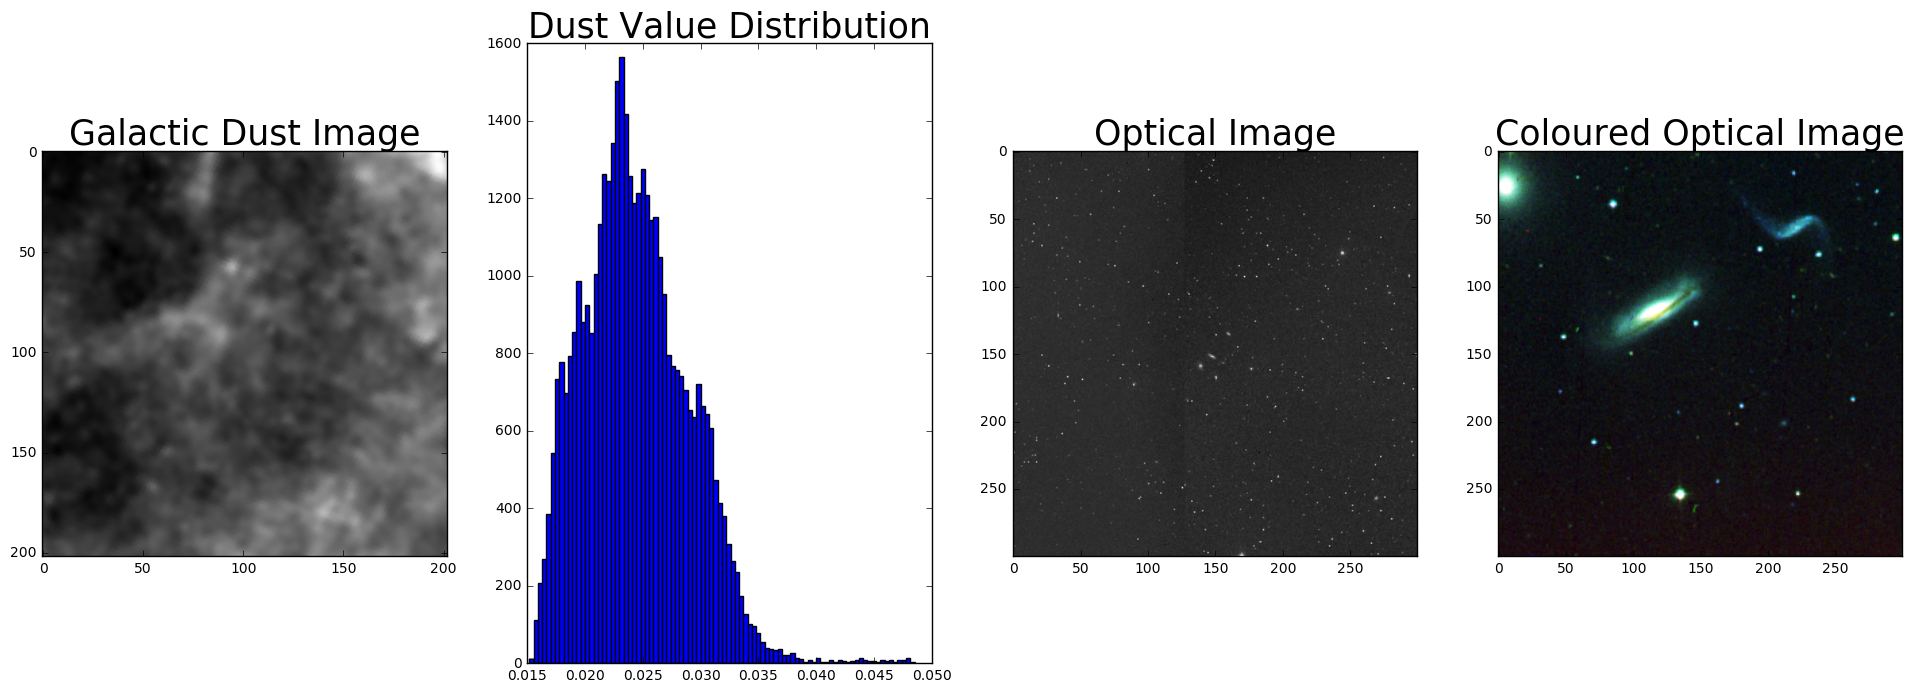

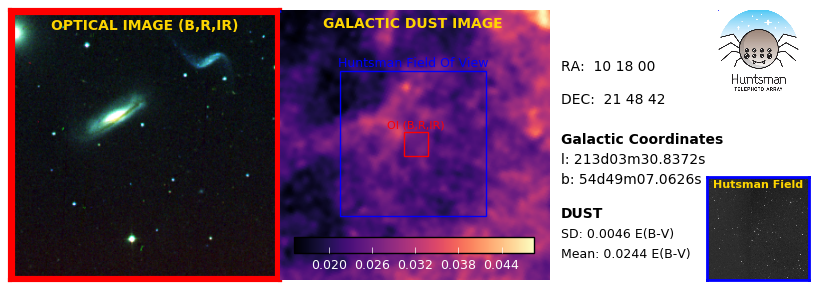

In [6]:
"""IMPORTS"""
from astropy import units as u
from astropy.coordinates import EarthLocation,SkyCoord
from astroquery.irsa_dust import IrsaDust
import astropy.units as u
from astroquery.skyview import SkyView

from astropy.io import fits as pyfits
import glob
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
%matplotlib inline
#!pip install aplpy
import aplpy
import numpy as np
import os

from astropy.time import Time
from astroplan import Observer
from astroplan import FixedTarget
from astroplan.plots import plot_airmass
#from astroplan import download_IERS_A
#download_IERS_A()

import matplotlib.patches as patches
import matplotlib


"""INPUT"""
'''RA and Dec'''
print ("Welcome! Please type in a potential target's RA and Dec (in the form RA:[hh mm ss] and Dec:[°° ′′ ″″]): ")
RA_DEC = (input("RA -> "),input("Dec -> "))
print()
'''Air-Mass'''
print ("Please designate the relevant time frame in which you wish to view this object (in form yyyy-mm-dd hh:mm:ss): ")
time = (input("Start Date & Time -> "),input("End Date & Time -> "))


"""This is the conversion from the inputed RA and Dec into the units of degrees. Then, through the '.galactic', l and b are found"""
lb=SkyCoord('%s %s'%(RA_DEC[0], RA_DEC[1]), unit=(u.hourangle,u.deg))
l_b = lb.galactic


"""Dowloading Relevent Images: dust, optical coloured"""
print ()
print ("-------------------------------------------------------------------------")
print ('Downloading Relevant Images: ')

'''DUST'''
dust_map = IrsaDust.get_images("%s %s" %(lb.ra, lb.dec), image_type="ebv", radius=5 * u.deg)
"""creating arrays"""
dust=[]
for f in dust_map:
    dust.append(np.array((f)[0].data, dtype=float))

 
'''OPTICAL IMAGES'''
path = SkyView.get_images(position="%s %s" %(lb.ra, lb.dec), survey=['DSS'], radius=2.6 * u.deg)
"""creating arrays"""
optical=[]
for f in path:
    optical.append(np.array((f)[0].data, dtype=float))

'''COLOURED OPTICAL IMAGE'''
pathr = SkyView.get_images(position="%s %s" %(lb.ra, lb.dec), survey=['DSS1 Red'], radius=0.2 * u.deg)#can decrease radius to zoom in coloured picture
opticalr=[]
for f in pathr:
    opticalr.append(np.array((f)[0].data, dtype=float))
pyfits.writeto("pathr.fit",opticalr[0],clobber=True)

pathb = SkyView.get_images(position="%s %s" %(lb.ra, lb.dec), survey=['DSS1 Blue'], radius=0.2 * u.deg)#can decrease radius to zoom in coloured picture
opticalb=[]
for f in pathb:
    opticalb.append(np.array((f)[0].data, dtype=float))
pyfits.writeto("pathb.fit",opticalb[0],clobber=True)

pathIR = SkyView.get_images(position="%s %s" %(lb.ra, lb.dec), survey=['DSS2 IR'], radius=0.2 * u.deg)#can decrease radius to zoom in coloured picture
opticalIR=[]
for f in pathIR:
    opticalIR.append(np.array((f)[0].data, dtype=float))
pyfits.writeto("pathIR.fit",opticalIR[0],clobber=True)
'''Saving coloured Image'''
aplpy.make_rgb_image(['pathIR.fit','pathr.fit','pathb.fit'], 'RGB.png')
print ("-------------------------------------------------------------------------")
print ()



"""RA and DEC"""
print ()
print ("RA [h m s]:",RA_DEC[0])
print ("DEC [° ′ ″]:",RA_DEC[1])
print ()

"""l and b: ...through the '.galactic', l and b are found"""
print ("Galactic longitude: ", l_b.l)
print ("Galactic latitude: ", l_b.b)
print ()

"""DUST VALUES"""
print ("DUST (Standard Deviation): ", np.std(dust[0]))
print ("DUST (Mean): ", np.mean(dust[0]))
print ("DUST (Min): ", np.min(dust[0]))
print ("DUST (Max): ", np.max(dust[0]))
print()
print()


"""AIR-MASS"""

'''Time'''
start_time = Time('%s'%(time[0]))
end_time = Time('%s'%(time[1]))
delta_t = end_time - start_time
observe_time = start_time + delta_t*np.linspace(0, 1, 75)
'''Parameters'''
longitude = 149.06119444444445 * u.deg
latitude = -31.273361111111114 * u.deg
elevation = 1149.000000001551  * u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)
observer = Observer(name='Siding Spring Observatory',location=location)
coordinates = SkyCoord('%s %s'%(RA_DEC[0], RA_DEC[1]), unit=(u.hourangle,u.deg), frame='icrs')
target = FixedTarget(name='Target', coord=coordinates)
'''Plot'''
plot_airmass(target, observer, observe_time, brightness_shading=True, altitude_yaxis=True).set_title('Air Mass (\'%s\' to \'%s\')'%(time[0],time[1]))
plt.tight_layout()
plt.show()
print()


"""PLOTS!"""
fig,ax = plt.subplots(ncols=4,figsize=(24,8))
plot = ax[0].imshow(dust[0].data,cmap='gray')
ax[0].set_title('Galactic Dust Image', fontsize=25)

plot2 = ax[1].hist(dust[0].flatten(),bins = 90)
ax[1].set_title('Dust Value Distribution', fontsize=25)

plot1 = ax[2].imshow(optical[0].data,cmap='gray')
ax[2].set_title('Optical Image', fontsize=25)

plot3 = ax[3].imshow(mpimg.imread('RGB.png'))
ax[3].set_title('Coloured Optical Image', fontsize=25)

"""Removing RGB file so this code can run continuously"""
#os.remove('RGB.png')




"""SAVED IMAGE :)"""
print ("Would you like to save this information?")
save = input("[y or n] ->  ")

while (save != "y") and (save !="n"):
    print ('Sorry, invalid input')
    save =  input("Would you like to save the information? [y or n] ->  ")
if save =='y':
    print ('Image saved as: \"Information (RA:%s-DEC%s).png\"'%(RA_DEC[0],RA_DEC[1]))
    fig = plt.figure(figsize=(8,2.7))
    #Coloured Image
    ax1 = fig.add_axes([0,0,0.337,1])#x,y,widthx widthy
    plt.imshow(mpimg.imread('RGB.png'),cmap='gray')
    ax1.axes.get_xaxis().set_ticks([])
    ax1.axes.get_yaxis().set_ticks([])
    plt.plot([0.02,0.02+(0.20)],[0.12,0.12+(1)],marker=None,color='red',linewidth=0.1)
    plt.text(45,22,"OPTICAL IMAGE (B,R,IR)", color='gold', fontweight='bold')
    ax1.add_patch(patches.Rectangle((3, 3),294,294,fill=False,edgecolor="red", linewidth=3))
    for child in ax1.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('red')
            child.set_lw(3)
    
    #Dust Map
    ax2 = fig.add_axes([0.337,0,0.337,1])#x,y,widthx widthy
    plt.imshow(dust[0].data,cmap='magma')
    ax2.axes.get_xaxis().set_ticks([])
    ax2.axes.get_yaxis().set_ticks([])
    plt.plot([0.19,0.19+(0.20-0.03)],[0.12,0.12+(1-0.24)],marker=None,linewidth=1)
    plt.text(32,13,"GALACTIC DUST IMAGE", color='gold',fontweight='bold')
    plt.text(43,42,"Huntsman Field Of View", color='#0000ff', size=9)
    plt.text(80,88,"OI (B,R,IR)", color='red', size=8)
    ax2.add_patch(patches.Rectangle((45, 45),109,109,fill=False,edgecolor="#0000ff"))
    ax2.add_patch(patches.Rectangle((93,90.5),18,18,fill=False,edgecolor="red"))
    for child in ax2.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('None')
            child.set_lw(2)
    ##Other Text
    plt.text(210,45,"RA:  %s"%(RA_DEC[0]), size=10)
    plt.text(210,70,"DEC:  %s"%(RA_DEC[1]), size=10)
    plt.text(210,100,"Galactic Coordinates", size=10, fontweight='bold')
    plt.text(210,115,"l: %s"%(l_b.l), size=10)
    plt.text(210,130,"b: %s"%(l_b.b), size=10)
    plt.text(210,155,"DUST", size=10, fontweight='bold')
    plt.text(210,170,"SD: %s E(B-V)"%(round(np.std(dust[0]),4)), size=9)
    plt.text(210,185,"Mean: %s E(B-V)"%(round(np.mean(dust[0]), 4)), size=9)
    ##changing Colorbar
    colour=plt.colorbar(cax=plt.axes([0.355, 0.1,0.3,0.06]),orientation="horizontal",ticks=np.linspace((round(np.min(dust[0]),2)),(round(np.max(dust[0]),2)), 5, endpoint=False))
    plt.setp(plt.getp(colour.ax.axes, 'xticklabels'), color='w', size=9)   
    colour.ax.xaxis.set_tick_params(color='w')
    
    #Optical
    ax3 = fig.add_axes([0.86,0,0.15,0.38])#x,y,widthx widthy
    plt.imshow(optical[0],cmap='gray')
    ax3.axes.get_xaxis().set_ticks([])
    ax3.axes.get_yaxis().set_ticks([])
    plt.plot([0.02,0.02+(0.20)],[0.12,0.12+(1)],marker=None,color='red',linewidth=0.1)
    plt.text(17,30,"Hutsman Field", color='gold', fontweight='bold',size = 8)
    for child in ax3.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('#0000ff')
            child.set_lw(2)
    
    #Logo
    ax4 = fig.add_axes([0.86,0.7,0.15,0.3])#x,y,widthx widthy
    plt.imshow(mpimg.imread('Logo.png'),cmap='gray')
    ax4.axes.get_xaxis().set_ticks([])
    ax4.axes.get_yaxis().set_ticks([])
    plt.plot([0.02,0.02+(0.20)],[0.12,0.12+(1)],marker=None)
    for child in ax4.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('None')
            child.set_lw(1)
    
    fig.savefig('Information (RA %s-DEC %s).png'%(RA_DEC[0],RA_DEC[1]))
else:
    print ("Image is not saved")

# Image Code

In [ ]:
print ("Would you like to save this information?")
save = input("[y or n] ->  ")

while (save != "y") and (save !="n"):
    print ('Sorry, invalid input')
    save =  input("Would you like to save the information? [y or n] ->  ")
if save =='y':
    print ('Image saved as: \"Information (RA:%s-DEC%s).png\"'%(RA_DEC[0],RA_DEC[1]))
    fig = plt.figure(figsize=(8,2.7))
    #Coloured Image
    ax1 = fig.add_axes([0,0,0.337,1])#x,y,widthx widthy
    plt.imshow(mpimg.imread('RGB.png'),cmap='gray')
    ax1.axes.get_xaxis().set_ticks([])
    ax1.axes.get_yaxis().set_ticks([])
    plt.plot([0.02,0.02+(0.20)],[0.12,0.12+(1)],marker=None,color='red',linewidth=0.1)
    plt.text(45,22,"OPTICAL IMAGE (B,R,IR)", color='gold', fontweight='bold')
    ax1.add_patch(patches.Rectangle((3, 3),294,294,fill=False,edgecolor="red", linewidth=3))
    for child in ax1.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('red')
            child.set_lw(3)
    
    #Dust Map
    ax2 = fig.add_axes([0.337,0,0.337,1])#x,y,widthx widthy
    plt.imshow(dust[0].data,cmap='magma')
    ax2.axes.get_xaxis().set_ticks([])
    ax2.axes.get_yaxis().set_ticks([])
    plt.plot([0.19,0.19+(0.20-0.03)],[0.12,0.12+(1-0.24)],marker=None,linewidth=1)
    plt.text(32,13,"GALACTIC DUST IMAGE", color='gold',fontweight='bold')
    plt.text(43,42,"Huntsman Field Of View", color='#0000ff', size=9)
    plt.text(80,88,"OI (B,R,IR)", color='red', size=8)
    ax2.add_patch(patches.Rectangle((45, 45),109,109,fill=False,edgecolor="#0000ff"))
    ax2.add_patch(patches.Rectangle((93,90.5),18,18,fill=False,edgecolor="red"))
    for child in ax2.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('None')
            child.set_lw(2)
    ##Other Text
    plt.text(210,45,"RA:  %s"%(RA_DEC[0]), size=10)
    plt.text(210,70,"DEC:  %s"%(RA_DEC[1]), size=10)
    plt.text(210,100,"Galactic Coordinates", size=10, fontweight='bold')
    plt.text(210,115,"l: %s"%(l_b.l), size=10)
    plt.text(210,130,"b: %s"%(l_b.b), size=10)
    plt.text(210,155,"DUST", size=10, fontweight='bold')
    plt.text(210,170,"SD: %s E(B-V)"%(round(np.std(dust[0]),4)), size=9)
    plt.text(210,185,"Mean: %s E(B-V)"%(round(np.mean(dust[0]), 4)), size=9)
    ##changing Colorbar
    colour=plt.colorbar(cax=plt.axes([0.355, 0.1,0.3,0.06]),orientation="horizontal",ticks=np.linspace((round(np.min(dust[0]),2)),(round(np.max(dust[0]),2)), 5, endpoint=False))
    plt.setp(plt.getp(colour.ax.axes, 'xticklabels'), color='w', size=9)   
    colour.ax.xaxis.set_tick_params(color='w')
    
    
    
    #Optical
    ax3 = fig.add_axes([0.86,0,0.15,0.38])#x,y,widthx widthy
    plt.imshow(optical[0],cmap='gray')
    ax3.axes.get_xaxis().set_ticks([])
    ax3.axes.get_yaxis().set_ticks([])
    plt.plot([0.02,0.02+(0.20)],[0.12,0.12+(1)],marker=None,color='red',linewidth=0.1)
    plt.text(17,30,"Hutsman Field", color='gold', fontweight='bold',size = 8)
    for child in ax3.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('#0000ff')
            child.set_lw(2)
    
    #Logo
    ax4 = fig.add_axes([0.86,0.7,0.15,0.3])#x,y,widthx widthy
    plt.imshow(mpimg.imread('Logo.png'),cmap='gray')
    ax4.axes.get_xaxis().set_ticks([])
    ax4.axes.get_yaxis().set_ticks([])
    plt.plot([0.02,0.02+(0.20)],[0.12,0.12+(1)],marker=None)
    for child in ax4.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color('None')
            child.set_lw(1)
    
    fig.savefig('Information (RA %s-DEC %s).png'%(RA_DEC[0],RA_DEC[1]))
else:
    print ("Image is not saved")